In [4]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [5]:
from matplotlib.pyplot import *
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import seaborn as sns
%matplotlib inline

In [7]:
XTrain = pd.read_csv('train.csv')
XTest = pd.read_csv('test.csv')

In [8]:
XTrain.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [9]:
yTrain = XTrain.pop('ACTION')

In [10]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(XTrain,yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [20]:
y_oob = model.oob_prediction_
print "c-stat: ", roc_auc_score(yTrain, y_oob)

c-stat:  0.868732508934


In [12]:
model.feature_importances_

array([ 0.37886634,  0.19672863,  0.03148514,  0.07057259,  0.11523132,
        0.03572998,  0.10428217,  0.02774391,  0.03935992])

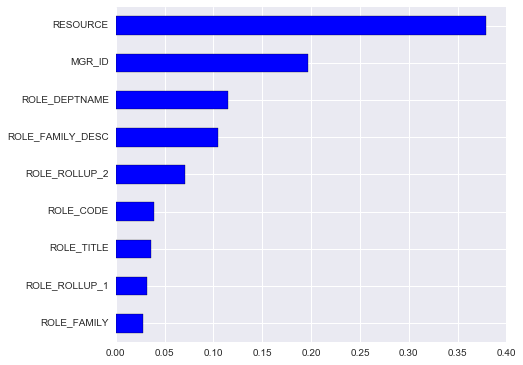

In [13]:
feature_importances = pd.Series(model.feature_importances_, index=XTrain.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6))

500 trees
C-stat:  0.857049865153

1000 trees
C-stat:  0.860197249568

2000 trees
C-stat:  0.863135564221

4000 trees
C-stat:  0.864132649744

6000 trees
C-stat:  0.864412266036

10000 trees
C-stat:  0.86451925122



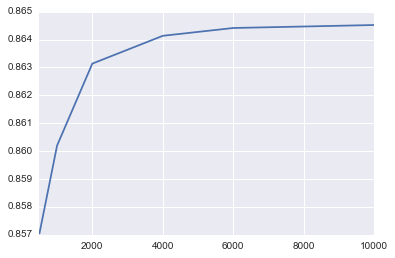

In [122]:
results = []
n_estimator_options = [500, 1000, 2000, 4000, 6000, 10000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(XTrain, yTrain)
    print trees, "trees"
    roc = roc_auc_score(yTrain, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.857049865153

None option
C-stat:  0.857049865153

sqrt option
C-stat:  0.858249002496

log2 option
C-stat:  0.858249002496

0.9 option
C-stat:  0.859243706017

0.2 option
C-stat:  0.854891284748



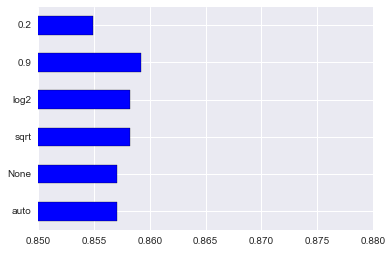

In [16]:
features_results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=500, oob_score=True,\
                                 n_jobs=-1, random_state=42,\
                                  max_features=max_features)
    model.fit(XTrain, yTrain)
    print max_features, "option"
    roc = roc_auc_score(yTrain, model.oob_prediction_)
    print "C-stat: ", roc
    features_results.append(roc)
    print ""
    
pd.Series(features_results, max_features_options).plot(kind="barh", xlim=(.85, .88))

1 min samples
C-Stat:  0.857049865153

2 min samples
C-Stat:  0.864781314122

3 min samples
C-Stat:  0.867809828956

4 min samples
C-Stat:  0.866778490417

5 min samples
C-Stat:  0.865260549007

6 min samples
C-Stat:  0.863717634997

7 min samples
C-Stat:  0.86249729869

8 min samples
C-Stat:  0.861174408236

9 min samples
C-Stat:  0.860639823821

10 min samples
C-Stat:  0.859259970223



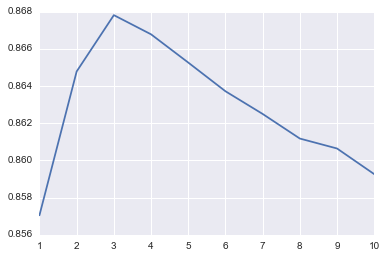

In [18]:
leaf_results = []
min_samples_leaf_options = [1,2,3,4,5,6,7,8,9,10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=500, oob_score=True, n_jobs=-1,\
                                 random_state=42, max_features="auto",\
                                  min_samples_leaf=min_samples)
    model.fit(XTrain,yTrain)
    print min_samples, "min samples"
    roc = roc_auc_score(yTrain, model.oob_prediction_)
    print "C-Stat: ", roc
    leaf_results.append(roc)
    print""

pd.Series(leaf_results, min_samples_leaf_options).plot()

In [19]:
model = RandomForestRegressor(n_estimators=6000, oob_score=True, n_jobs=-1, random_state=42,\
                              max_features=.9, min_samples_leaf=3)
model.fit(XTrain,yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.9, max_leaf_nodes=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=6000, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

XTest has an 'id' column that XTrain didn't, so it won't fit in the predict function. The next statement pops 'id' into a numpy array.

In [21]:
yID = XTest.pop("id")

In [22]:
yTest = model.predict(XTest)

In [23]:
type(yTest), type(yID)

(numpy.ndarray, pandas.core.series.Series)

In [24]:
yID = yID.as_matrix()

In [25]:
type(yTest), type(yID)

(numpy.ndarray, numpy.ndarray)

In [26]:
submission = pd.Series(yTest, index=yID)

In [27]:
submission.head(5), type(submission)

(1    0.961030
 2    0.993890
 3    0.998984
 4    0.998176
 5    0.998692
 dtype: float64, pandas.core.series.Series)

In [28]:
submission.to_csv("submission.csv",index=True,sep=',',\
                  header=True,index_label=('Id','Action'))